In [1]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
# Read in data
users = pd.read_table('ml-1m/users.dat',  sep = '::', engine = 'python', header = None, names= ['ID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
ratings = pd.read_table('ml-1m/ratings.dat',  sep = '::', engine = 'python', header = None, names= ['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies = pd.read_table('ml-1m/movies.dat',  sep = '::', engine = 'python', header = None, names= ['ID', 'Title', 'Genre'], encoding='ISO-8859-1')

In [3]:
# Define dimension reduction methods
pca = PCA(n_components = 2)
youmap = umap.UMAP()
tsne = TSNE()

In [4]:
# Use tryout data
mmat = np.random.uniform(low = 1.0, high = 5.0, size = (40, 3706))
umat = np.random.uniform(low = 1.0, high = 5.0, size = (6040, 40))
mmatswapped = np.swapaxes(mmat,0,1)

In [6]:
# Create labels for colors
movies.rename(columns = {'ID':'MovieID'}, inplace = True)
users.rename(columns = {'ID': 'UserID'}, inplace = True)
merged = pd.merge(ratings, movies, on = 'MovieID')
merged = pd.merge(merged, users, on = 'UserID')

movielabel = merged.groupby('MovieID').first()
userlabel = merged.groupby('UserID').first()

movielabel['FirstGenre'] = movielabel['Genre']
movielabel['FirstGenre'] = movielabel['FirstGenre'].apply(lambda x: x.split('|')[0])
print(movielabel)

         UserID  Rating   Timestamp                               Title  \
MovieID                                                                   
1             1       5   978824268                    Toy Story (1995)   
2            18       2   978152541                      Jumanji (1995)   
3            62       3   977904968             Grumpier Old Men (1995)   
4           155       1   977256575            Waiting to Exhale (1995)   
5            48       3   978013996  Father of the Bride Part II (1995)   
...         ...     ...         ...                                 ...   
3948         15       3   978197734             Meet the Parents (2000)   
3949        150       4   995414747          Requiem for a Dream (2000)   
3950        151       3   998696892                    Tigerland (2000)   
3951        195       5  1033617344             Two Family House (2000)   
3952        102       3  1039274093               Contender, The (2000)   

                        

In [8]:
# Apply dimension reduction
tsneuser = tsne.fit_transform(umat)
umapuser = youmap.fit_transform(umat)
pcauser = pca.fit_transform(umat)
tsnemovie = tsne.fit_transform(mmatswapped)
umapmovie = youmap.fit_transform(mmatswapped)
pcamovie = pca.fit_transform(mmatswapped)
print(tsneuser.shape, pcauser.shape, umapuser.shape, tsnemovie.shape, pcamovie.shape, umapmovie.shape)

(6040, 2) (6040, 2) (6040, 2) (3706, 2) (3706, 2) (3706, 2)


Text(0.5, 1.0, 'Umap Dimension Reduction')

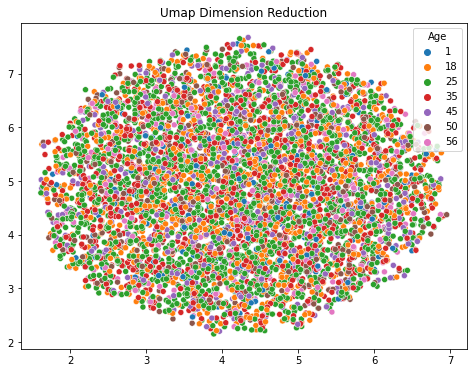

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = umapuser[:, 0], y = umapuser[:, 1], hue = users['Age'], legend = 'full', palette = sns.color_palette(n_colors=7))
plt.title("Umap Dimension Reduction")

Text(0.5, 1.0, 'PCA Dimension Reduction')

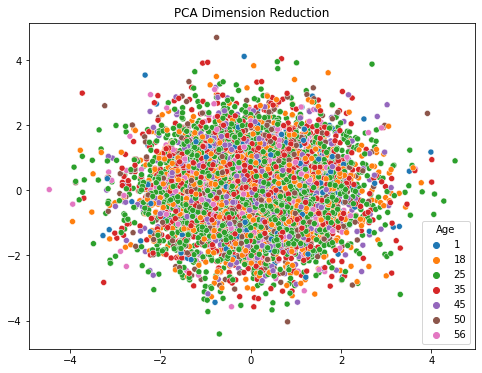

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = pcauser[:, 0], y = pcauser[:, 1], hue = users['Age'], legend = 'full', palette = sns.color_palette(n_colors=7))
plt.title("PCA Dimension Reduction")

Text(0.5, 1.0, 'TNSE Dimension Reduction')

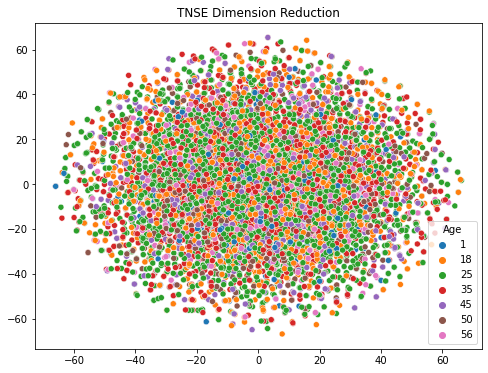

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsneuser[:, 0], y = tsneuser[:, 1], hue = users['Age'], legend = 'full', palette = sns.color_palette(n_colors=7))
plt.title("TNSE Dimension Reduction")

Text(0.5, 1.0, 'TSNE Dimension Reduction')

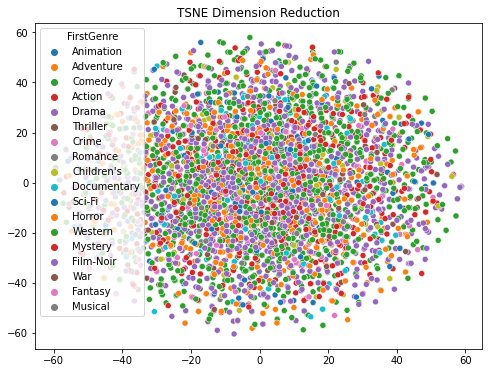

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsnemovie[:, 0], y = tsnemovie[:, 1], hue = movielabel['FirstGenre'], palette = sns.color_palette(n_colors=18))
plt.title("TSNE Dimension Reduction")

Text(0.5, 1.0, 'PCA Dimension Reduction')

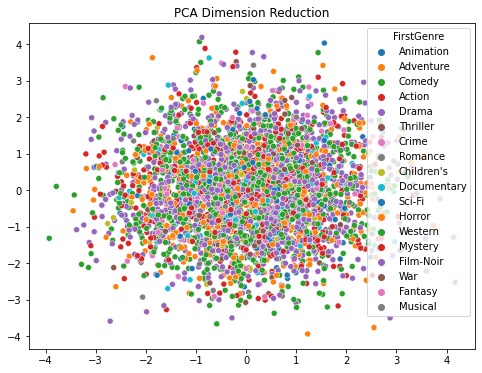

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = pcamovie[:, 0], y = pcamovie[:, 1], hue = movielabel['FirstGenre'], palette = sns.color_palette(n_colors=18))
plt.title("PCA Dimension Reduction")

Text(0.5, 1.0, 'Umap Dimension Reduction')

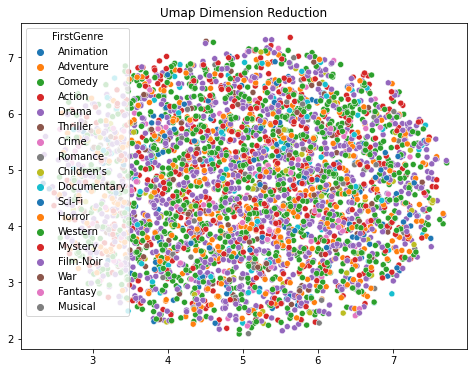

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = umapmovie[:, 0], y = umapmovie[:, 1], hue = movielabel['FirstGenre'], palette = sns.color_palette(n_colors=18))
plt.title("Umap Dimension Reduction")

Text(0.5, 1.0, 'PCA Dimension Reduction')

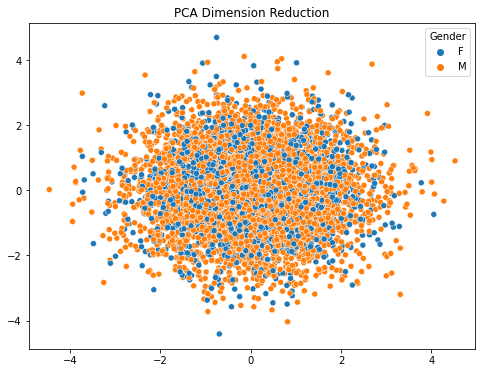

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = pcauser[:, 0], y = pcauser[:, 1], hue = users['Gender'], legend = 'full', palette = sns.color_palette(n_colors=2))
plt.title("PCA Dimension Reduction")

Text(0.5, 1.0, 'Umap Dimension Reduction')

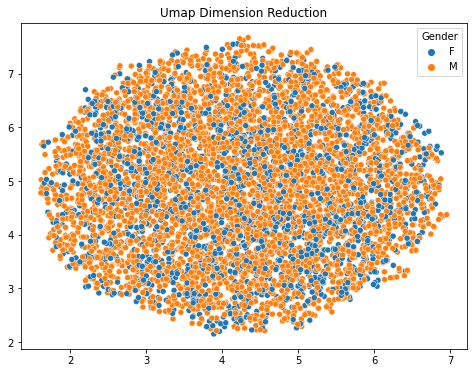

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = umapuser[:, 0], y = umapuser[:, 1], hue = users['Gender'], legend = 'full', palette = sns.color_palette(n_colors=2))
plt.title("Umap Dimension Reduction")

Text(0.5, 1.0, 'TSNE Dimension Reduction')

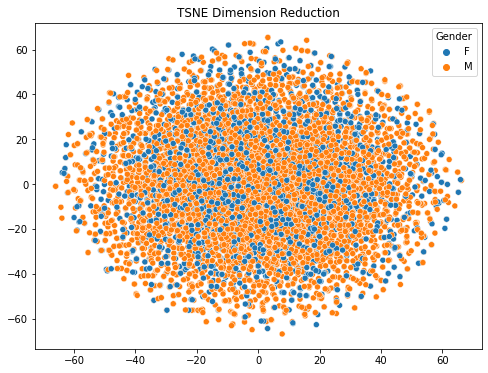

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsneuser[:, 0], y = tsneuser[:, 1], hue = users['Gender'], legend = 'full', palette = sns.color_palette(n_colors=2))
plt.title("TSNE Dimension Reduction")